In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as py
import time
from datetime import datetime

from pyspark.sql.functions import col
from pyspark.sql.types import StringType,BooleanType,DateType

In [17]:
city_file = "Cities_oppening.csv"

job_df = pd.read_csv(city_file)

job_df.head()

,Job Title,Company Name,city,state,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Senior Business Analyst - Land,Berks Homes,Mohnton,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ISS-P Data Center Analyst,Consolidated Nuclear Security,Amarillo,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Junior Data Analyst,Strategic Marketing Services,Louisville,KY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data Analyst (Louisiana),Tetra Tech Inc.,Laplace,LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Marketing Data Analyst,Mercedes Scientific,Sarasota,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
job_df=City_df.drop(columns=["Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10"])
job_df

,Job Title,Company Name,city,state
0,Senior Business Analyst - Land,Berks Homes,Mohnton,PA
1,ISS-P Data Center Analyst,Consolidated Nuclear Security,Amarillo,TX
2,Junior Data Analyst,Strategic Marketing Services,Louisville,KY
3,Data Analyst (Louisiana),Tetra Tech Inc.,Laplace,LA
4,Marketing Data Analyst,Mercedes Scientific,Sarasota,FL
...,...,...,...,...
16458,SQL Server Developer,The Salvation Army Eastern Territory,West Nyack,NY
16459,.Net Developer,SAIC,Fort Knox,KY
16460,Principal BI Developer,Providence,Renton,WA
16461,Sr Business Intelligence Developer/Analyst,NTT DATA,Chapel Hill,NC


In [19]:

job_df['Number of Openings'] = job_df.groupby('state')['state'].transform('count')
job_df.head()
#job_df.to_csv('openin_state.csv')

,Job Title,Company Name,city,state,Number of Openings
0,Senior Business Analyst - Land,Berks Homes,Mohnton,PA,260.0
1,ISS-P Data Center Analyst,Consolidated Nuclear Security,Amarillo,TX,944.0
2,Junior Data Analyst,Strategic Marketing Services,Louisville,KY,41.0
3,Data Analyst (Louisiana),Tetra Tech Inc.,Laplace,LA,25.0
4,Marketing Data Analyst,Mercedes Scientific,Sarasota,FL,495.0


In [20]:
focoused_job_df=job_df.loc[(job_df["Job Title"]=="Data Analyst")|(job_df["Job Title"]=="Data Engineer")|(job_df["Job Title"]=="Data Scientist")|
                            (job_df["Job Title"]=="Data Architect")|(job_df["Job Title"]=="Big Data Software Engineer")|
                            (job_df["Job Title"]=="Machine Learning Engineer")| (job_df["Job Title"]=="Business Intelligence Analyst")|
                            (job_df["Job Title"]=="Logistics Analyst")| (job_df["Job Title"]=="Business Systems Analyst")|
                            (job_df["Job Title"]=="Marketing Analyst")| (job_df["Job Title"]=="Data Warehouse Manager")|
                            (job_df["Job Title"]=="Database Manager")| (job_df["Job Title"]=="Data Modeler")|
                            (job_df["Job Title"]=="Database Administrator")| (job_df["Job Title"]=="Quantitative Analyst")|
                            (job_df["Job Title"]=="IT Systems Analyst")| (job_df["Job Title"]=="Statistician")|
                            (job_df["Job Title"]=="Data Storyteller")| (job_df["Job Title"]=="Machine Learning Scientist")|
                            (job_df["Job Title"]=="Database Admin")| (job_df["Job Title"]=="Business Intelligence Developer")
                          ]


In [26]:
focoused_job_df2=focoused_job_df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
focoused_job_df2.reset_index(drop=True, inplace=True)
focoused_job_df2.sort_values(by='Number of Openings',ascending=False)


,Job Title,Company Name,city,state,Number of Openings
1342,Machine Learning Engineer,BlackBerry,Irvine,CA,2125.0
617,Data Engineer,Amazon.com Services LLC,Santa Monica,CA,2125.0
508,Data Architect,Match Inc,Sunnyvale,CA,2125.0
523,Data Engineer,Meta,Menlo Park,CA,2125.0
528,Data Architect,FanDuel,Los Angeles,CA,2125.0
...,...,...,...,...,...
1390,Business Intelligence Developer,Ezra,Remote,NaN,NaN
1396,Business Intelligence Developer,HORIZON CREDIT UNION,United States,NaN,NaN
1440,Business Intelligence Developer,Zensoft,Missouri,NaN,NaN
1448,Business Intelligence Analyst,Ascential,Oregon,NaN,NaN


In [22]:
focoused_job_df2.to_csv('JobTitle_count.csv')


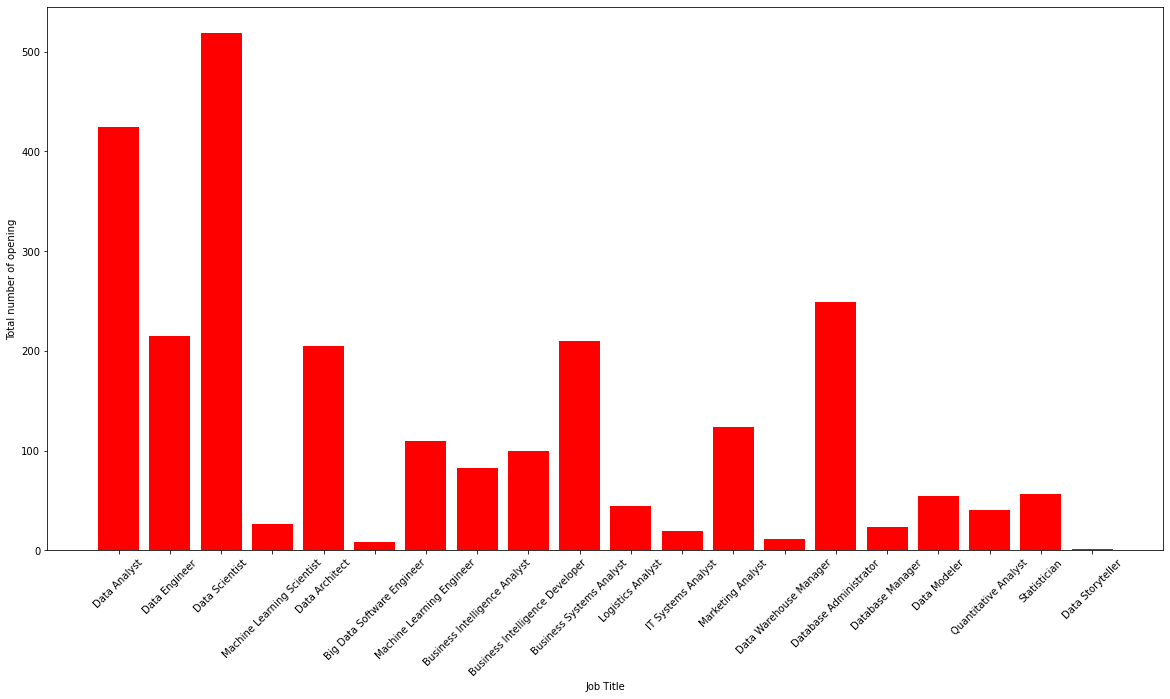

In [9]:
fig=plt.figure(num=None, figsize=(20,10))
x_axis=(focoused_job_df2["Job Title"])
y_axis=(focoused_job_df2["Number of Openings"]) 
plt.bar(x_axis,y_axis, color="red")
plt.xticks(rotation=45)
plt.style.use('fivethirtyeight')
plt.xlabel('Job Title')
plt.ylabel('Total number of opening')
#a=py.arange(52)
#plt.xaxis.set_ticks(a)

plt.show()

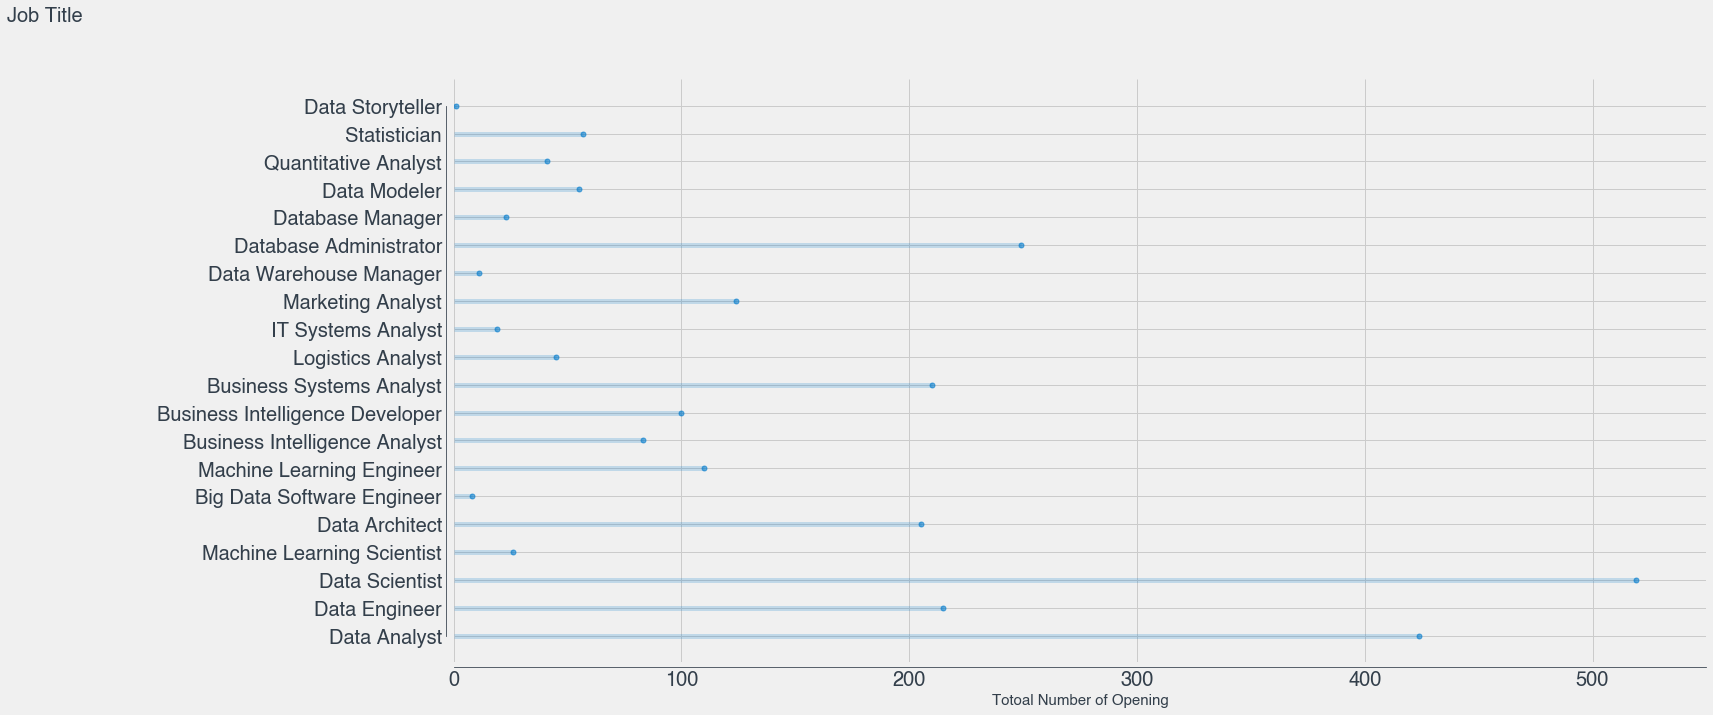

In [10]:
# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

my_range=list(range(1,len(focoused_job_df2.index)+1))

fig, ax = plt.subplots(figsize=(20,10))

plt.hlines(y=my_range, xmin=0, xmax=focoused_job_df2["Number of Openings"], color='#007ACC', alpha=0.2, linewidth=5)
plt.plot(focoused_job_df2["Number of Openings"], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Totoal Number of Opening', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=20)
plt.yticks(my_range, focoused_job_df2["Job Title"])

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Job Title', fontsize=20, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((1, len(my_range)))
ax.set_xlim(0,550)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.savefig('hist2.png', dpi=300, bbox_inches='tight')
